# Exploratopry Data Analysis

## import libraries

In [28]:
%%capture

# libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for data visualization
import IPython.display
import matplotlib.pyplot as plt
import seaborn as sns

# autoreload modules
%load_ext autoreload
%autoreload 2


# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# libraries for file management
import os
import shutil

os.chdir("../src")
import data_utils
import visualization

## load data

In [6]:
headers_df = pd.read_excel('../dataset/raw/PAKDD2010_VariablesList.XLS') 
headers = headers_df['Var_Title'].tolist()

In [8]:
headers_unique = []

for header in headers:
    if header not in headers_unique:
        headers_unique.append(header)
    else:
        header_duplicated = header + "_2"
        headers_unique.append(header_duplicated)
        print(f'{header} feature is duplicated and is replaced by {header_duplicated}')

EDUCATION_LEVEL feature is duplicated and is replaced by EDUCATION_LEVEL_2


In [14]:
features_list = headers_unique.copy()
features_list.remove("ID_CLIENT")
features_list.remove("TARGET_LABEL_BAD=1")
data_utils.save_data_checkpoint(features_list,'../data/raw/features_list.pickle')

Object saved successfully in ../data/raw/features_list.pickle.


In [35]:
df = pd.read_csv('../dataset/raw/PAKDD2010_Modeling_Data.txt', sep='\t', encoding= 'unicode_escape', names= headers_unique, low_memory=False, index_col ='ID_CLIENT' )
IPython.display.HTML(df.head().to_html())

,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL_2,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [36]:
df.shape

(50000, 53)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLERK_TYPE                      50000 non-null  object 
 1   PAYMENT_DAY                     50000 non-null  int64  
 2   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 3   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 4   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 5   SEX                             50000 non-null  object 
 6   MARITAL_STATUS                  50000 non-null  int64  
 7   QUANT_DEPENDANTS                50000 non-null  int64  
 8   EDUCATION_LEVEL                 50000 non-null  int64  
 9   STATE_OF_BIRTH                  50000 non-null  object 
 10  CITY_OF_BIRTH                   50000 non-null  object 
 11  NACIONALITY                     50000 non-null  int64  
 12  RESIDENCIAL_STATE               

In [38]:
round(df.describe(),2)

,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,...,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL_2,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD=1
count,50000.00,50000.0,50000.00,50000.00,50000.00,50000.0,50000.00,48651.00,46223.00,50000.0,...,42687.00,21116.00,17662.00,50000.0,50000.0,50000.0,50000.0,50000.00,50000.00,50000.00
mean,12.87,0.0,1.01,2.15,0.65,0.0,0.96,1.25,9.73,0.8,...,2.48,3.80,0.30,0.0,0.0,0.0,0.0,1.28,43.25,0.26
std,6.61,0.0,0.08,1.32,1.19,0.0,0.20,0.87,10.67,0.4,...,1.53,5.21,0.96,0.0,0.0,0.0,0.0,0.99,14.99,0.44
min,1.00,0.0,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.00,6.00,0.00
25%,10.00,0.0,1.00,1.00,0.00,0.0,1.00,1.00,1.00,1.0,...,1.00,0.00,0.00,0.0,0.0,0.0,0.0,1.00,31.00,0.00
50%,10.00,0.0,1.00,2.00,0.00,0.0,1.00,1.00,6.00,1.0,...,2.00,0.00,0.00,0.0,0.0,0.0,0.0,1.00,41.00,0.00
75%,15.00,0.0,1.00,2.00,1.00,0.0,1.00,1.00,15.00,1.0,...,4.00,11.00,0.00,0.0,0.0,0.0,0.0,1.00,53.00,1.00
max,25.00,0.0,2.00,7.00,53.00,0.0,2.00,5.00,228.00,1.0,...,5.00,17.00,5.00,0.0,0.0,0.0,0.0,7.00,106.00,1.00


In [39]:
raw_df = df[features_list]
data_utils.save_data_checkpoint(raw_df,'../dataset/raw/X_train.pickle')

Object saved successfully in ../dataset/raw/X_train.pickle.


In [40]:
visualization.missing_values_table(df)

There are 8 columns that have missing values.


,Total,Percent
PROFESSIONAL_CITY,33783,67.6
PROFESSIONAL_BOROUGH,33783,67.6
EDUCATION_LEVEL_2,32338,64.7
MATE_PROFESSION_CODE,28884,57.8
PROFESSION_CODE,7756,15.5
OCCUPATION_TYPE,7313,14.6
MONTHS_IN_RESIDENCE,3777,7.6
RESIDENCE_TYPE,1349,2.7


In [43]:
without_nan = df.dropna().shape[0]

print(f'Data without NaN values: {without_nan:,} applicants of a total {df.shape[0]:,} corresponding to {round((without_nan)/(df.shape[0]),4)*100}% of the total data.')

Data without NaN values: 5,987 applicants of a total 50,000 corresponding to 11.97% of the total data.


In [44]:
empty_data = ((df.eq(' ')).sum()).sum()
total_rows = df.shape[0]*df.shape[1]

print(f'Empty Data: {empty_data:,} rows of a total {total_rows:,} corresponding to {round(empty_data/total_rows,2)*100}% of the total data.')

Empty Data: 84,467 rows of a total 2,650,000 corresponding to 3.0% of the total data.


In [45]:
print(f'Dataset features datatypes:\n{df.dtypes.value_counts()}')

Dataset features datatypes:
int64      24
object     20
float64     9
dtype: int64


In [46]:
cat_features = df.select_dtypes('O').nunique()
cat_features_list = list(cat_features.index)
print(f'Categorical columns({cat_features.shape[0]}) classes:\n\n{cat_features}')

Categorical columns(20) classes:

CLERK_TYPE                          1
APPLICATION_SUBMISSION_TYPE         3
SEX                                 4
STATE_OF_BIRTH                     29
CITY_OF_BIRTH                    9910
RESIDENCIAL_STATE                  27
RESIDENCIAL_CITY                 3529
RESIDENCIAL_BOROUGH             14511
FLAG_RESIDENCIAL_PHONE              2
RESIDENCIAL_PHONE_AREA_CODE       102
FLAG_MOBILE_PHONE                   1
COMPANY                             2
PROFESSIONAL_STATE                 28
PROFESSIONAL_CITY                2236
PROFESSIONAL_BOROUGH             5057
FLAG_PROFESSIONAL_PHONE             2
PROFESSIONAL_PHONE_AREA_CODE       87
FLAG_ACSP_RECORD                    1
RESIDENCIAL_ZIP_3                 794
PROFESSIONAL_ZIP_3                794
dtype: int64


In [53]:
visualization.series_count(df['APPLICATION_SUBMISSION_TYPE'])

,Count,%
Web,28206,56.41
0,19461,38.92
Carga,2333,4.67


In [54]:
 df['APPLICATION_SUBMISSION_TYPE'][df['APPLICATION_SUBMISSION_TYPE']=='0']


ID_CLIENT
6        0
9        0
10       0
14       0
18       0
        ..
49993    0
49994    0
49995    0
49996    0
49997    0
Name: APPLICATION_SUBMISSION_TYPE, Length: 19461, dtype: object

In [55]:
visualization.series_count(df['SEX'])

,Count,%
F,30805,61.61
M,19130,38.26
N,48,0.10
,17,0.03


In [56]:
visualization.series_count(df['STATE_OF_BIRTH'])

,Count,%
BA,5717,11.43
SP,5695,11.39
RS,5017,10.03
CE,4786,9.57
PE,4098,8.20
MG,3776,7.55
,2064,4.13
RN,2008,4.02
PR,1971,3.94
RJ,1826,3.65


In [57]:
cat_num_features = df.select_dtypes("number").nunique()[df.select_dtypes("number").nunique()<15]
cat_num_features_list = list(cat_num_features.index)
cat_num_features_list.append('PROFESSION_CODE')
cat_num_features_list.append('MATE_PROFESSION_CODE')
print(f'Categorical numerical columns ({df[cat_num_features_list].shape[1]}):\n\n{df[cat_num_features_list].nunique()}')

Categorical numerical columns (26):

PAYMENT_DAY                        6
QUANT_ADDITIONAL_CARDS             1
POSTAL_ADDRESS_TYPE                2
MARITAL_STATUS                     8
EDUCATION_LEVEL                    1
NACIONALITY                        3
RESIDENCE_TYPE                     6
FLAG_EMAIL                         2
FLAG_VISA                          2
FLAG_MASTERCARD                    2
FLAG_DINERS                        2
FLAG_AMERICAN_EXPRESS              2
FLAG_OTHER_CARDS                   2
QUANT_BANKING_ACCOUNTS             3
QUANT_SPECIAL_BANKING_ACCOUNTS     3
QUANT_CARS                         2
OCCUPATION_TYPE                    6
EDUCATION_LEVEL_2                  6
FLAG_HOME_ADDRESS_DOCUMENT         1
FLAG_RG                            1
FLAG_CPF                           1
FLAG_INCOME_PROOF                  1
PRODUCT                            3
TARGET_LABEL_BAD=1                 2
PROFESSION_CODE                   19
MATE_PROFESSION_CODE              18
d

In [59]:
visualization.series_count(df['POSTAL_ADDRESS_TYPE'])

,Count,%
1,49673,99.35
2,327,0.65


In [60]:
visualization.series_count(df['MARITAL_STATUS'])

,Count,%
2,25967,51.93
1,15286,30.57
4,4206,8.41
6,1877,3.75
5,1296,2.59
3,632,1.26
7,534,1.07
0,202,0.40


In [61]:
visualization.series_count(df['RESIDENCE_TYPE'])


,Count,%
1.0,41572,83.14
2.0,3884,7.77
5.0,1983,3.97
NaN,1349,2.70
0.0,760,1.52
4.0,311,0.62
3.0,141,0.28


In [62]:
visualization.series_count(df['FLAG_DINERS'])


,Count,%
0,49934,99.87
1,66,0.13


In [64]:
visualization.series_count(df['FLAG_AMERICAN_EXPRESS'])

,Count,%
0,49913,99.83
1,87,0.17


In [66]:
visualization.series_count(df['FLAG_OTHER_CARDS'])

,Count,%
0,49898,99.8
1,102,0.2


In [67]:
visualization.series_count(df['OCCUPATION_TYPE'])

,Count,%
2.0,16947,33.89
1.0,8742,17.48
NaN,7313,14.63
4.0,7000,14.00
5.0,6891,13.78
0.0,2788,5.58
3.0,319,0.64


In [68]:
number_dtype = df.select_dtypes("number").columns
num_features_list = list(set(number_dtype) - set(cat_num_features.index))
num_features_list.remove('PROFESSION_CODE')
num_features_list.remove('MATE_PROFESSION_CODE')


num_features = df.select_dtypes("number").nunique()[num_features_list]
print(f'Numerical columns ({num_features.shape[0]}):\n\n{num_features}')

Numerical columns (7):

PERSONAL_ASSETS_VALUE       153
MONTHS_IN_THE_JOB            21
OTHER_INCOMES               615
AGE                          89
MONTHS_IN_RESIDENCE          88
PERSONAL_MONTHLY_INCOME    5495
QUANT_DEPENDANTS             17
dtype: int64


In [69]:
visualization.series_count(df["MONTHS_IN_THE_JOB"]).sort_index()

,Count,%
0,49924,99.85
1,15,0.03
2,18,0.04
3,12,0.02
4,4,0.01
5,6,0.01
6,2,0.00
7,2,0.00
8,2,0.00
9,1,0.00


In [70]:
cat_constant = list(cat_features[cat_features==1].index)
cat_constant

['CLERK_TYPE', 'FLAG_MOBILE_PHONE', 'FLAG_ACSP_RECORD']

In [71]:
catnum_constant = list(cat_num_features[cat_num_features==1].index)
catnum_constant

['QUANT_ADDITIONAL_CARDS',
 'EDUCATION_LEVEL',
 'FLAG_HOME_ADDRESS_DOCUMENT',
 'FLAG_RG',
 'FLAG_CPF',
 'FLAG_INCOME_PROOF']

In [74]:
df.MONTHS_IN_THE_JOB.value_counts().head(5)

0    49924
2       18
1       15
3       12
5        6
Name: MONTHS_IN_THE_JOB, dtype: int64

In [75]:
num_constant = ['MONTHS_IN_THE_JOB']

In [76]:
df.shape[0]

50000

In [77]:
nan_features = list(df.isna().sum()[df.isna().sum()>df.shape[0]/2].index)
nan_features

['PROFESSIONAL_CITY',
 'PROFESSIONAL_BOROUGH',
 'MATE_PROFESSION_CODE',
 'EDUCATION_LEVEL_2']

In [78]:
empty_features = list(df.eq(' ').sum()[df.eq(' ').sum()>df.shape[0]/2].index)
empty_features

['PROFESSIONAL_STATE', 'PROFESSIONAL_PHONE_AREA_CODE']

In [79]:
remove_features = [*nan_features,*empty_features,*cat_constant,*catnum_constant,*num_constant]

df = df.drop(remove_features,axis = 1)
print(f'Quantity of columns without constants, empty or NaN: {len(df.columns)}')

Quantity of columns without constants, empty or NaN: 37


In [80]:
print(f'Features removed from raw dataset:\n\n'
      f'Categorical constant({len(cat_constant)}): {cat_constant})\n'
      f'Categorical numerical constant ({len(catnum_constant)}): {catnum_constant})\n'
      f'Numerical constant ({len(num_constant)}): {num_constant})\n'
      f'Empty features ({len(empty_features)}): {empty_features})\n'
      f'NaN_features ({len(nan_features)}): {nan_features})')

Features removed from raw dataset:

Categorical constant(3): ['CLERK_TYPE', 'FLAG_MOBILE_PHONE', 'FLAG_ACSP_RECORD'])
Categorical numerical constant (6): ['QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF'])
Numerical constant (1): ['MONTHS_IN_THE_JOB'])
Empty features (2): ['PROFESSIONAL_STATE', 'PROFESSIONAL_PHONE_AREA_CODE'])
NaN_features (4): ['PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL_2'])


In [108]:
IPython.display.HTML(df.head().to_html())

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,Web,1,F,6,1,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,N,9.0,4.0,1,32,595,595,1
2,15,Carga,1,F,2,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,11.0,4.0,1,34,230,230,1
3,5,Web,1,F,2,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,11.0,NaN,1,27,591,591,0
4,20,Web,1,F,2,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,NaN,NaN,1,61,545,545,0
5,10,Web,1,M,2,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,9.0,5.0,1,48,235,235,1


In [89]:
train_df, test_df = train_test_split(df,
                                    test_size=0.2,
                                    random_state=42,
                                    shuffle=True)

In [ ]:
X_train

In [90]:
X_train, y_train, X_test, y_test= data_utils.get_features(train_df, test_df)

In [107]:
IPython.display.HTML(X_train.head().to_html())

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39088,5,Web,1,F,1,0,RJ,RIO DE JANEIRO,1,RJ,RIO BONITO,BOA ESPERANCA,Y,20,1.0,8.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,2.0,4.0,1,29,288,288
30894,10,0,1,F,2,2,CE,QUIXADA,1,CE,HORIZONTE,CATOLE,Y,107,1.0,1.0,1,600.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,N,9.0,2.0,1,40,608,608
45279,15,Web,1,F,2,0,BA,NOVA IBIA,1,BA,NOVA IBIA,ROSALINA MOURA,Y,84,1.0,5.0,1,350.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,9.0,5.0,2,52,454,454
16399,20,0,1,M,2,0,PA,TAILANDIA,1,PA,TAILANDIA,CENTRO,N,,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,NaN,NaN,1,46,686,686
13654,25,0,1,F,1,0,CE,ITAPIPOCA,1,CE,FORTALEZA,JOAO XXIII,Y,107,1.0,0.0,0,350.0,0.0,0,0,0,0,0,1,1,0.0,1,N,N,0.0,0.0,1,40,607,607


In [110]:
print(f"X_train shape = {X_train.shape}, X_test shape = {X_test.shape}\n"
      f"y_train shape = {y_train.shape}, y_test shape = {y_test.shape}")

X_train shape = (40000, 36), X_test shape = (10000, 36)
y_train shape = (40000,), y_test shape = (10000,)


In [111]:
print(f'y_train label distribution:\n {visualization.series_count(y_train)}\n\n'
      f'y_test label distribution:\n{visualization.series_count(y_test)}')

y_train label distribution:
    Count      %
0  29623  74.06
1  10377  25.94

y_test label distribution:
   Count      %
0   7336  73.36
1   2664  26.64


C:\Users\crist\AppData\Local\Temp\ipykernel_24812\4109198034.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot=True);


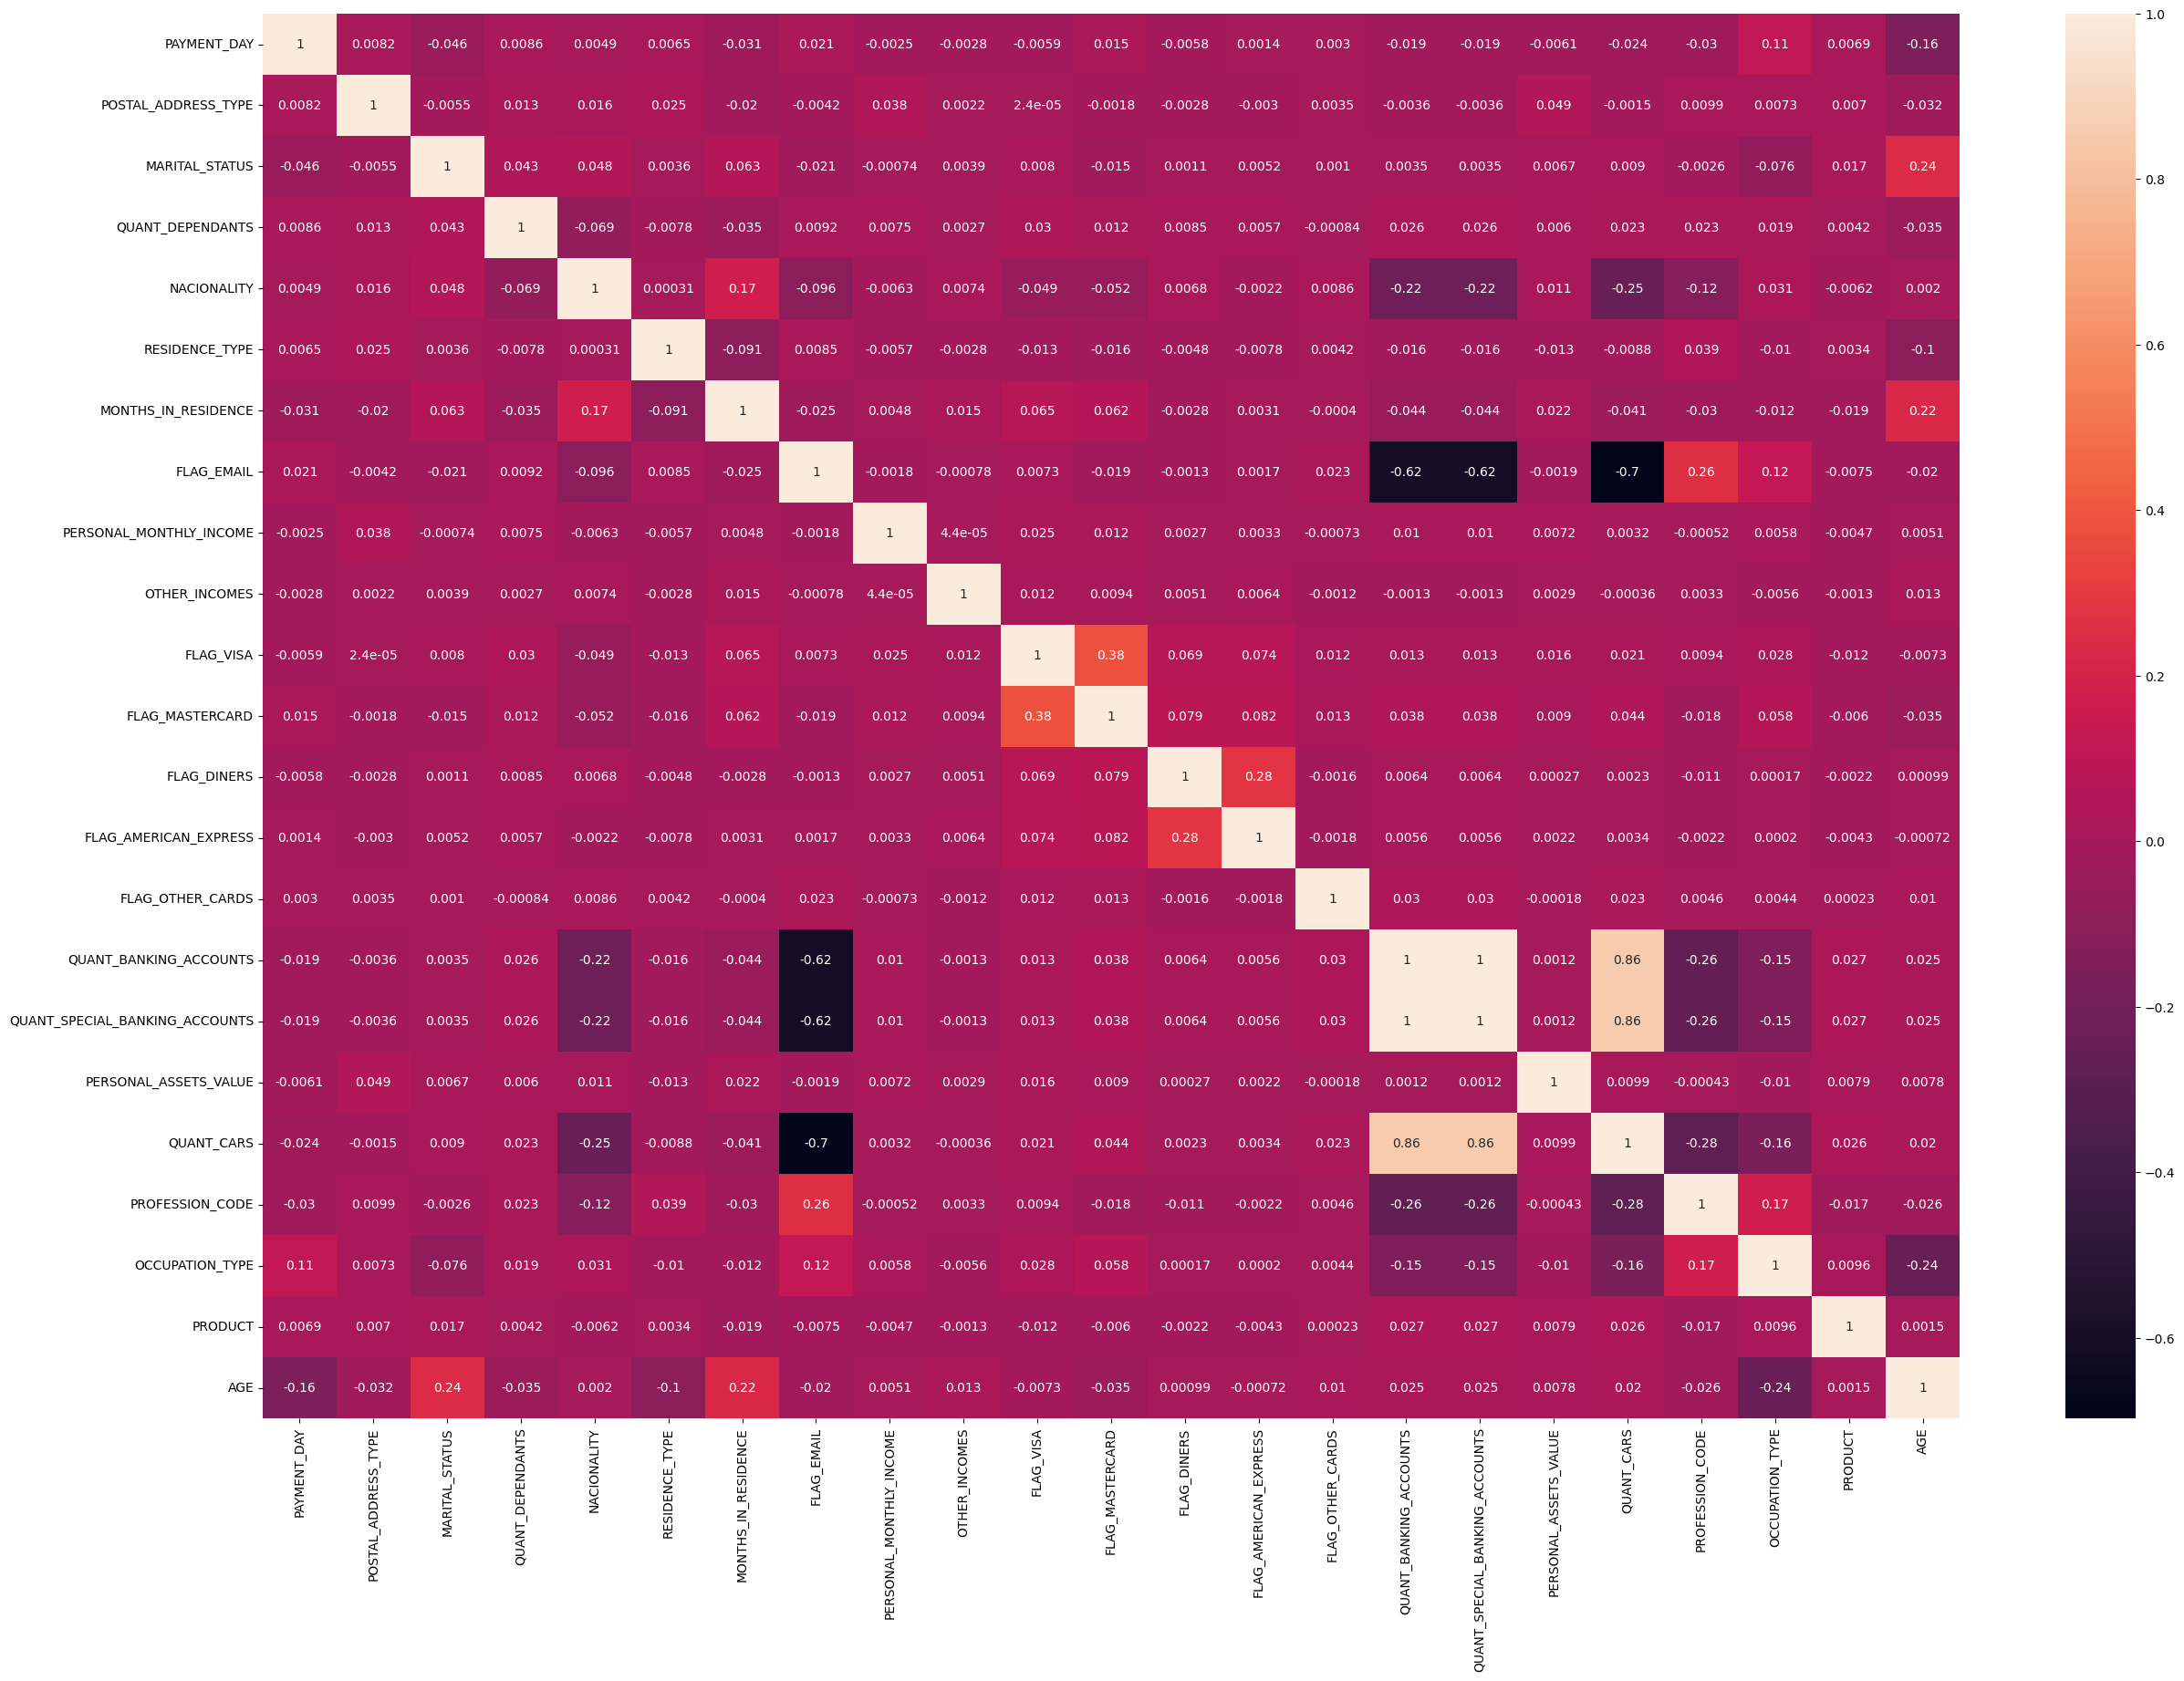

In [95]:
plt.figure(figsize=(30, 20))
sns.heatmap(X_train.corr(), annot=True);

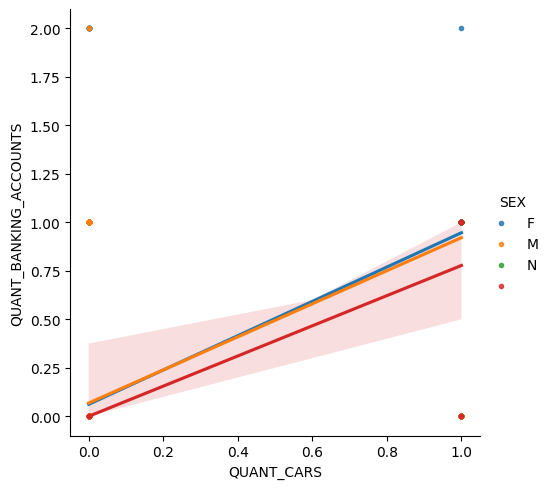

In [96]:
sns.lmplot(data=X_train,x="QUANT_CARS", y="QUANT_BANKING_ACCOUNTS", markers=".",hue="SEX")


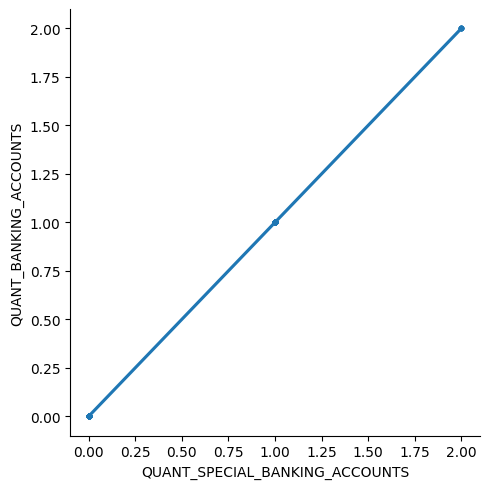

In [97]:
sns.lmplot(data=X_train,x="QUANT_SPECIAL_BANKING_ACCOUNTS", y="QUANT_BANKING_ACCOUNTS", markers=".")

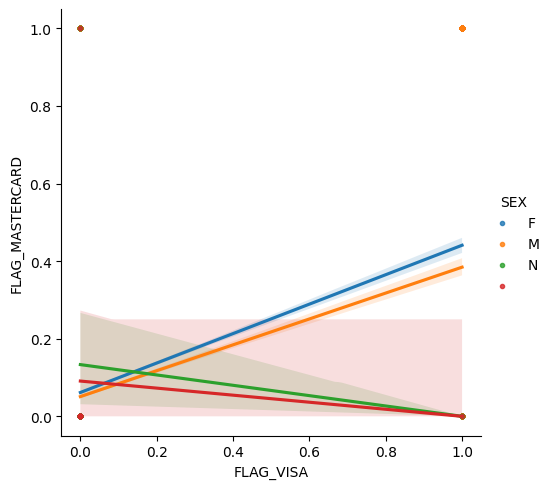

In [98]:
sns.lmplot(data=X_train,x="FLAG_VISA", y="FLAG_MASTERCARD", markers=".",hue="SEX")

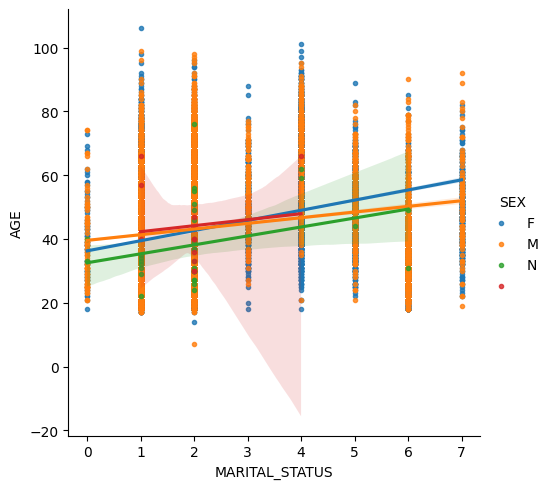

In [99]:
sns.lmplot(data=X_train,x="MARITAL_STATUS", y="AGE", markers=".",hue="SEX")

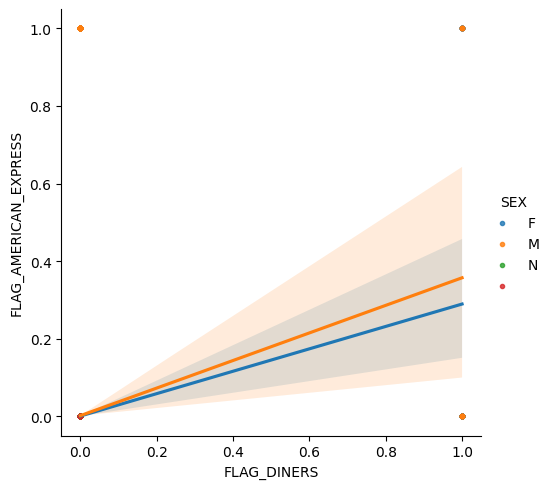

In [100]:
sns.lmplot(data=X_train,x="FLAG_DINERS", y="FLAG_AMERICAN_EXPRESS", markers=".",hue="SEX")

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df,df['TARGET_LABEL_BAD=1'],test_size=0.20,random_state=42, stratify=df['TARGET_LABEL_BAD=1'])

<Figure size 1600x800 with 0 Axes>

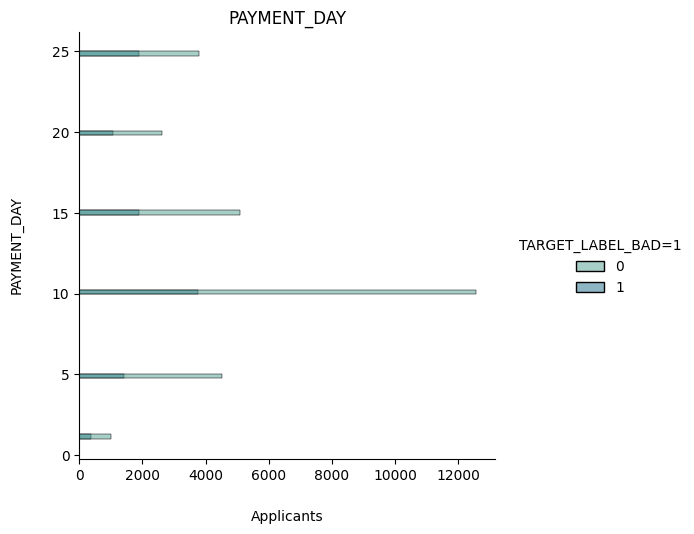

<Figure size 1600x800 with 0 Axes>

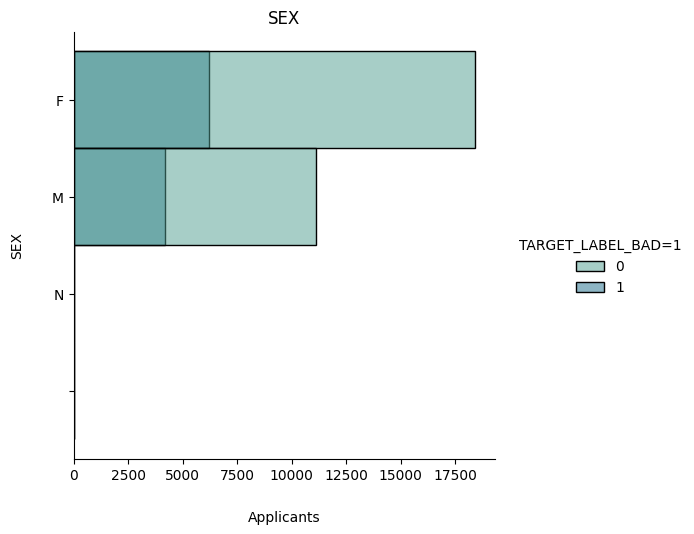

<Figure size 1600x800 with 0 Axes>

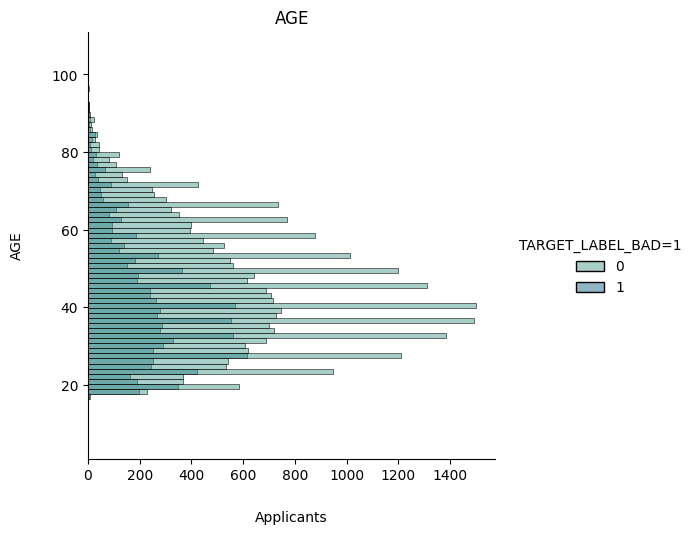

<Figure size 1600x800 with 0 Axes>

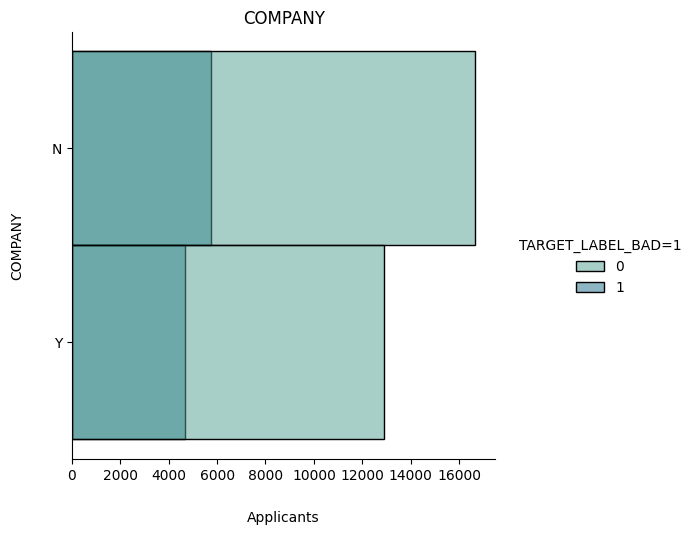

<Figure size 1600x800 with 0 Axes>

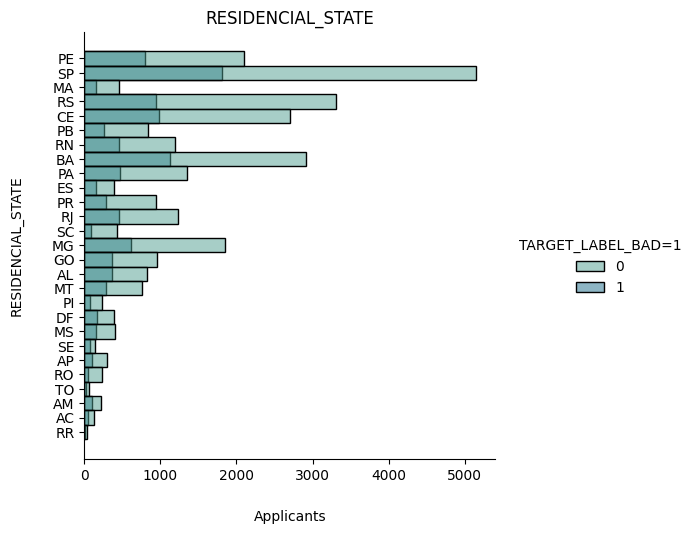

In [113]:
variables = ["PAYMENT_DAY","SEX","AGE","COMPANY","RESIDENCIAL_STATE"]

for y in variables:
    plt.figure(figsize=(16, 8))
    #plot displot
    chart = sns.displot(
       data = X_train, 
       y = y,
       hue = 'TARGET_LABEL_BAD=1', 
       palette = "crest",
       )

    #customize plot
    chart.set(title=y)
    plt.xlabel('Applicants', fontsize=10,labelpad=20)
    plt.ylabel(y, fontsize=10, labelpad=20)

    plt.show()

In [114]:
residencial_target = pd.DataFrame(X_train.groupby(X_train['RESIDENCIAL_STATE'])['TARGET_LABEL_BAD=1'].sum())
residencial_target['Total applicants'] = X_train['RESIDENCIAL_STATE'].value_counts().sort_index()
residencial_target['%'] = round(residencial_target['TARGET_LABEL_BAD=1']/residencial_target['Total applicants']*100,2)
residencial_target = residencial_target.sort_values(by='%', ascending=False)
residencial_target

,TARGET_LABEL_BAD=1,Total applicants,%
RESIDENCIAL_STATE,,,
SE,79,217,36.41
AM,100,326,30.67
AL,361,1180,30.59
DF,168,562,29.89
TO,27,93,29.03
RR,14,49,28.57
ES,154,545,28.26
BA,1124,4041,27.81
MS,156,563,27.71


In [115]:
num_features_list.remove('MONTHS_IN_THE_JOB')
round(X_train[num_features_list].describe())

,PERSONAL_ASSETS_VALUE,OTHER_INCOMES,AGE,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,QUANT_DEPENDANTS
count,40000.0,40000.0,40000.0,36921.0,40000.0,40000.0
mean,2322.0,36.0,43.0,10.0,885.0,1.0
std,44449.0,991.0,15.0,11.0,7859.0,1.0
min,0.0,0.0,6.0,0.0,60.0,0.0
25%,0.0,0.0,31.0,1.0,360.0,0.0
50%,0.0,0.0,41.0,6.0,500.0,0.0
75%,0.0,0.0,53.0,15.0,800.0,1.0
max,6000000.0,194344.0,106.0,200.0,959000.0,15.0


In [116]:
X_train['TARGET_LABEL_BAD=1'][X_train["PERSONAL_MONTHLY_INCOME"]>100000].value_counts()

0    13
1     4
Name: TARGET_LABEL_BAD=1, dtype: int64

In [117]:
IPython.display.HTML(X_train[X_train["PERSONAL_MONTHLY_INCOME"]>100000].sort_values(by="PERSONAL_MONTHLY_INCOME",ascending=False).to_html())

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31054,15,0,1,F,1,0,CE,ALTO SANTO,1,CE,FORTALEZA,CENTRO,Y,107,1.0,17.0,1,959000.0,0.0,1,0,0,0,0,1,1,0.0,0,Y,Y,7.0,5.0,1,29,600,600,1
48272,1,0,1,F,2,2,SC,FPOLIS,1,SC,FPOLIS,SACO GRANDE,Y,50,1.0,46.0,0,875000.0,0.0,0,0,0,0,0,1,1,60000.0,1,Y,Y,0.0,0.0,2,41,880,880,0
32631,10,0,1,M,5,1,RJ,RIO DE JANEIRO,1,RJ,SAO GONCALO,ITAUNA,Y,20,1.0,25.0,1,486778.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,9.0,1.0,1,57,244,244,0
6502,5,Web,1,F,1,3,PI,PIRACURUCA,1,PI,PARNAIBA,PIAUI,Y,110,1.0,2.0,1,300409.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,NaN,4.0,1,63,642,642,1
11405,10,Web,2,M,2,0,AM,ikf cu,1,MG,UBERLANDIA,CIDADE JARDIM,Y,32,1.0,1.0,1,216395.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,11.0,2.0,1,28,384,384,0
32748,20,0,1,F,1,0,GO,DIANOPOLIS,1,GO,GOIANIA,VILA CORONEL COSMO,Y,67,1.0,15.0,0,198183.0,0.0,0,1,0,0,0,1,1,60000.0,1,Y,Y,9.0,2.0,1,51,746,746,0
39986,10,0,1,F,1,0,RS,POA,1,RS,Alvorada,aparecida,Y,54,1.0,5.0,1,177991.0,0.0,0,0,0,0,0,1,1,0.0,1,N,N,9.0,1.0,1,65,948,948,0
49074,10,0,1,M,2,0,SP,SAU PAULO,1,SP,OSASCO,MUNHOZ JUNIOR,Y,5,1.0,34.0,0,174274.0,0.0,1,0,0,0,0,1,1,0.0,1,Y,Y,9.0,2.0,1,44,624,624,1
1034,15,0,1,F,4,0,AL,ARAPIRACA,1,AL,ARAPIRACA,BAIXAO,Y,100,1.0,14.0,0,150040.0,0.0,0,0,0,0,0,1,1,0.0,1,N,N,9.0,1.0,1,62,573,573,0


<Figure size 1000x500 with 0 Axes>

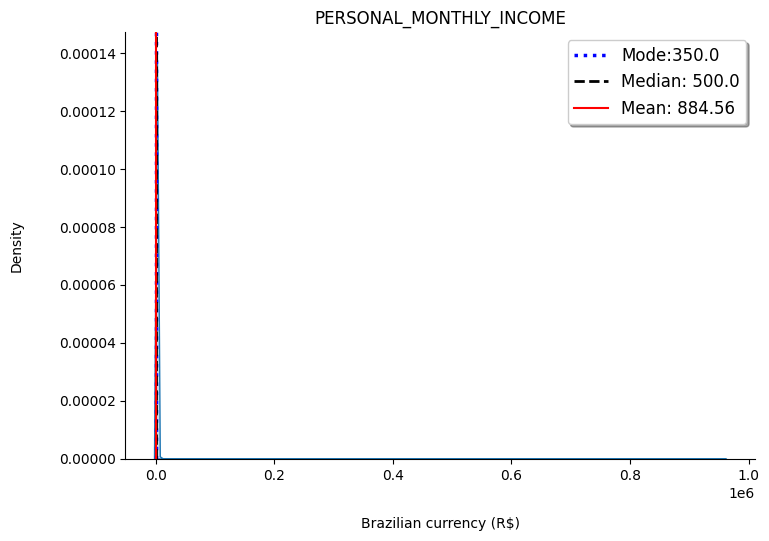

In [119]:
visualization.sns_displot(X_train['PERSONAL_MONTHLY_INCOME'],'PERSONAL_MONTHLY_INCOME','Brazilian currency (R$)','Density')

(0.0, 2000.0)

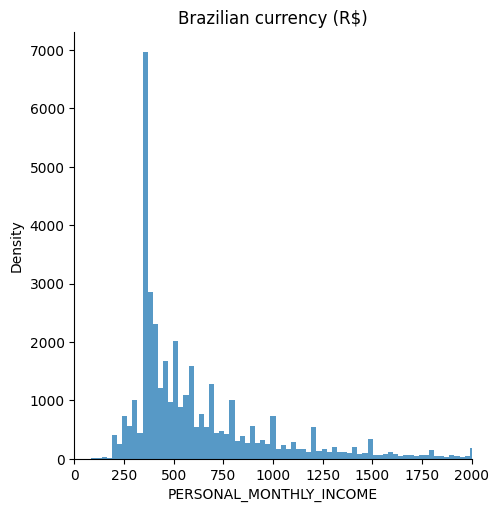

In [123]:

sns.displot(X_train['PERSONAL_MONTHLY_INCOME'])
plt.xlabel('PERSONAL_MONTHLY_INCOME')
plt.ylabel('Density')
plt.title('Brazilian currency (R$)')

# Establecer límites del eje x
plt.xlim(0, 2000)  # Puedes ajustar los valores límite según tus necesidades


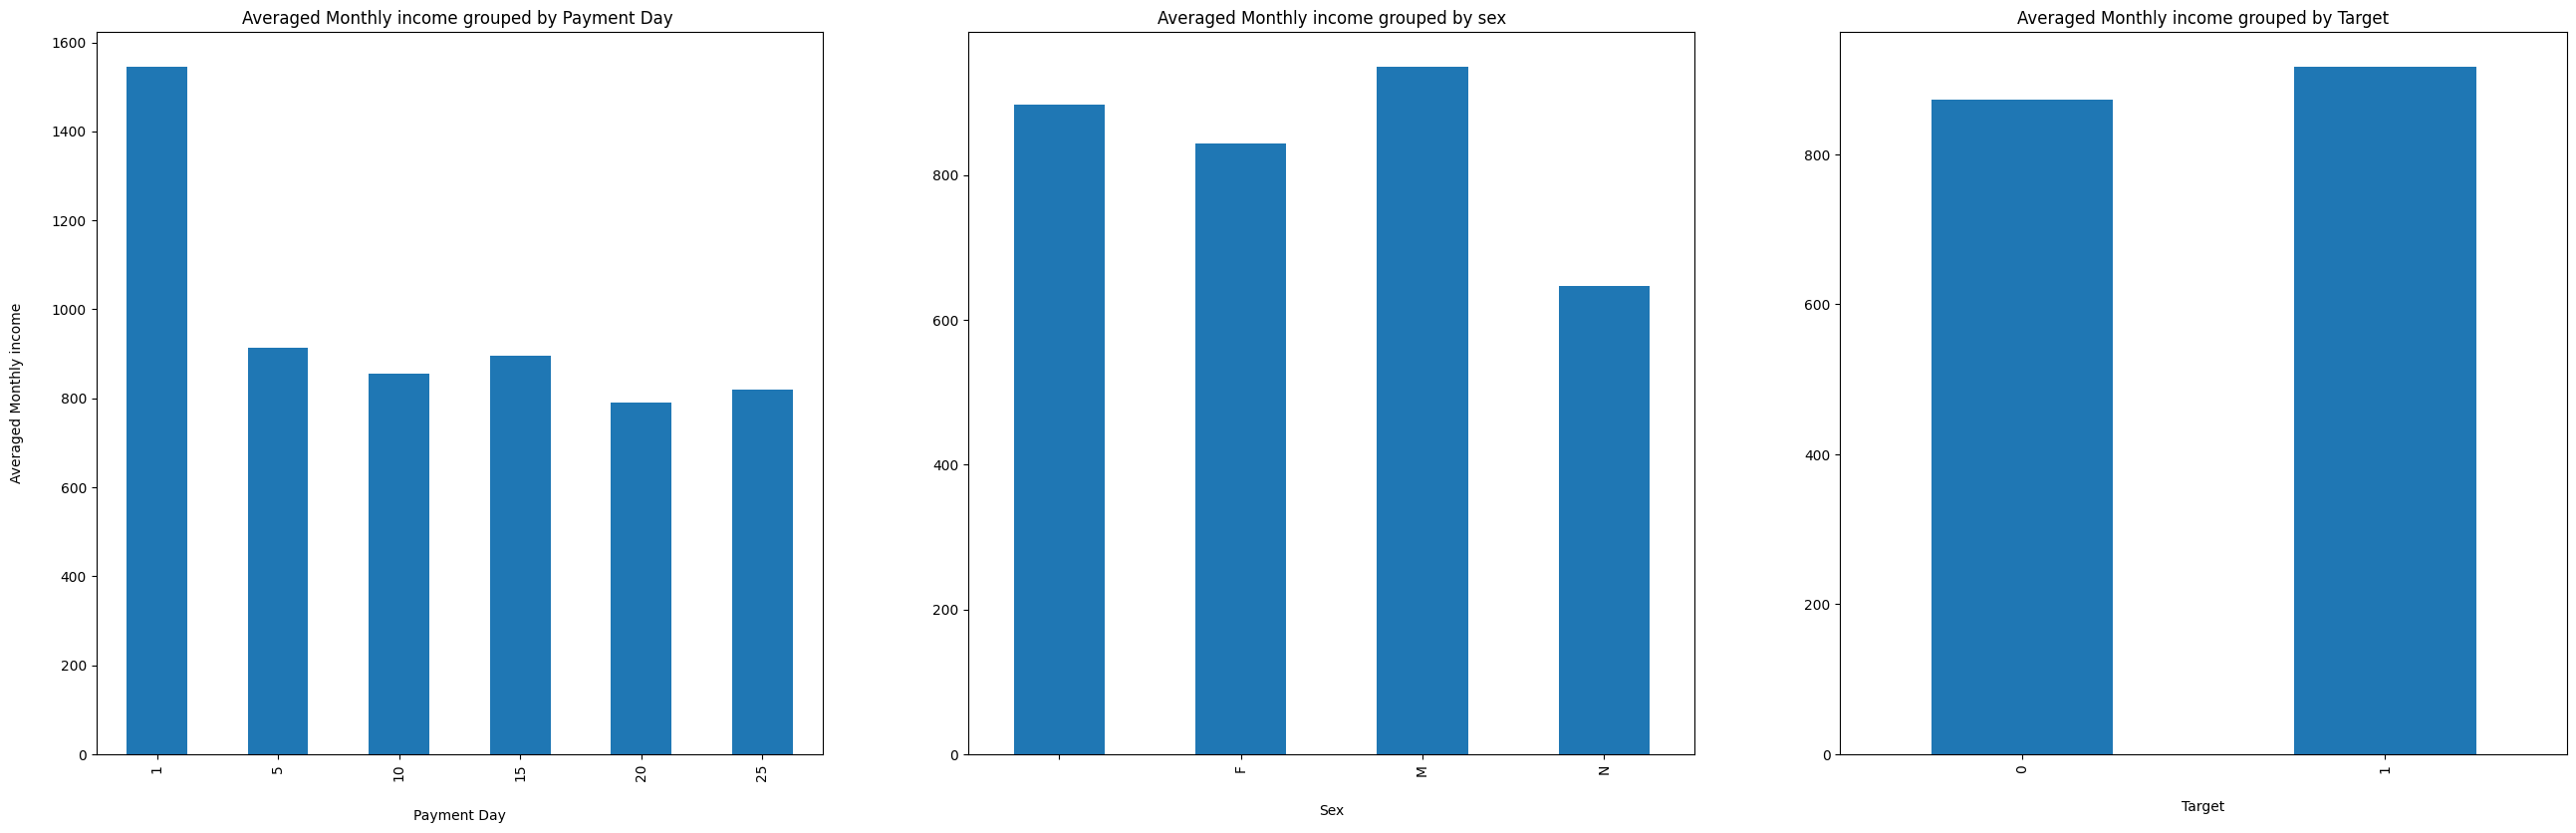

In [120]:
plt.figure(figsize=(32, 32))
plt.subplot(331)
chart = X_train.groupby(X_train['PAYMENT_DAY'])['PERSONAL_MONTHLY_INCOME'].mean().plot.bar()
chart.set(title="Averaged Monthly income grouped by Payment Day ")
plt.xlabel('Payment Day', fontsize=10,labelpad=20)
plt.ylabel('Averaged Monthly income', fontsize=10, labelpad=20)

plt.subplot(332)
chart = X_train.groupby(X_train['SEX'])['PERSONAL_MONTHLY_INCOME'].mean().plot.bar()
chart.set(title="Averaged Monthly income grouped by sex")
plt.xlabel('Sex', fontsize=10,labelpad=20)
plt.ylabel('', fontsize=10, labelpad=20)

plt.subplot(333)
chart = X_train.groupby(X_train['TARGET_LABEL_BAD=1'])['PERSONAL_MONTHLY_INCOME'].mean().plot.bar()
chart.set(title="Averaged Monthly income grouped by Target")
plt.xlabel('Target', fontsize=10,labelpad=20)
plt.ylabel('', fontsize=10, labelpad=20)

plt.show()

In [122]:
IPython.display.HTML(X_train[X_train['OTHER_INCOMES']==194344.0].to_html())

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14198,10,Web,1,M,1,1,BA,Coracao De Maria,1,AM,manaus,Sao Jose I,N,,1.0,20.0,1,871.0,194344.0,0,0,0,0,0,0,0,0.0,0,Y,N,9.0,1.0,1,63,690,690,1


<Figure size 1000x500 with 0 Axes>

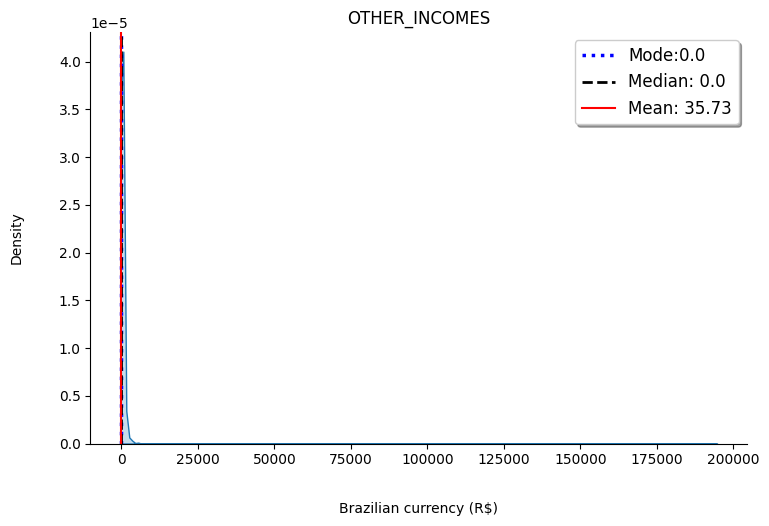

In [124]:
visualization.sns_displot(X_train['OTHER_INCOMES'],'OTHER_INCOMES','Brazilian currency (R$)','Density')

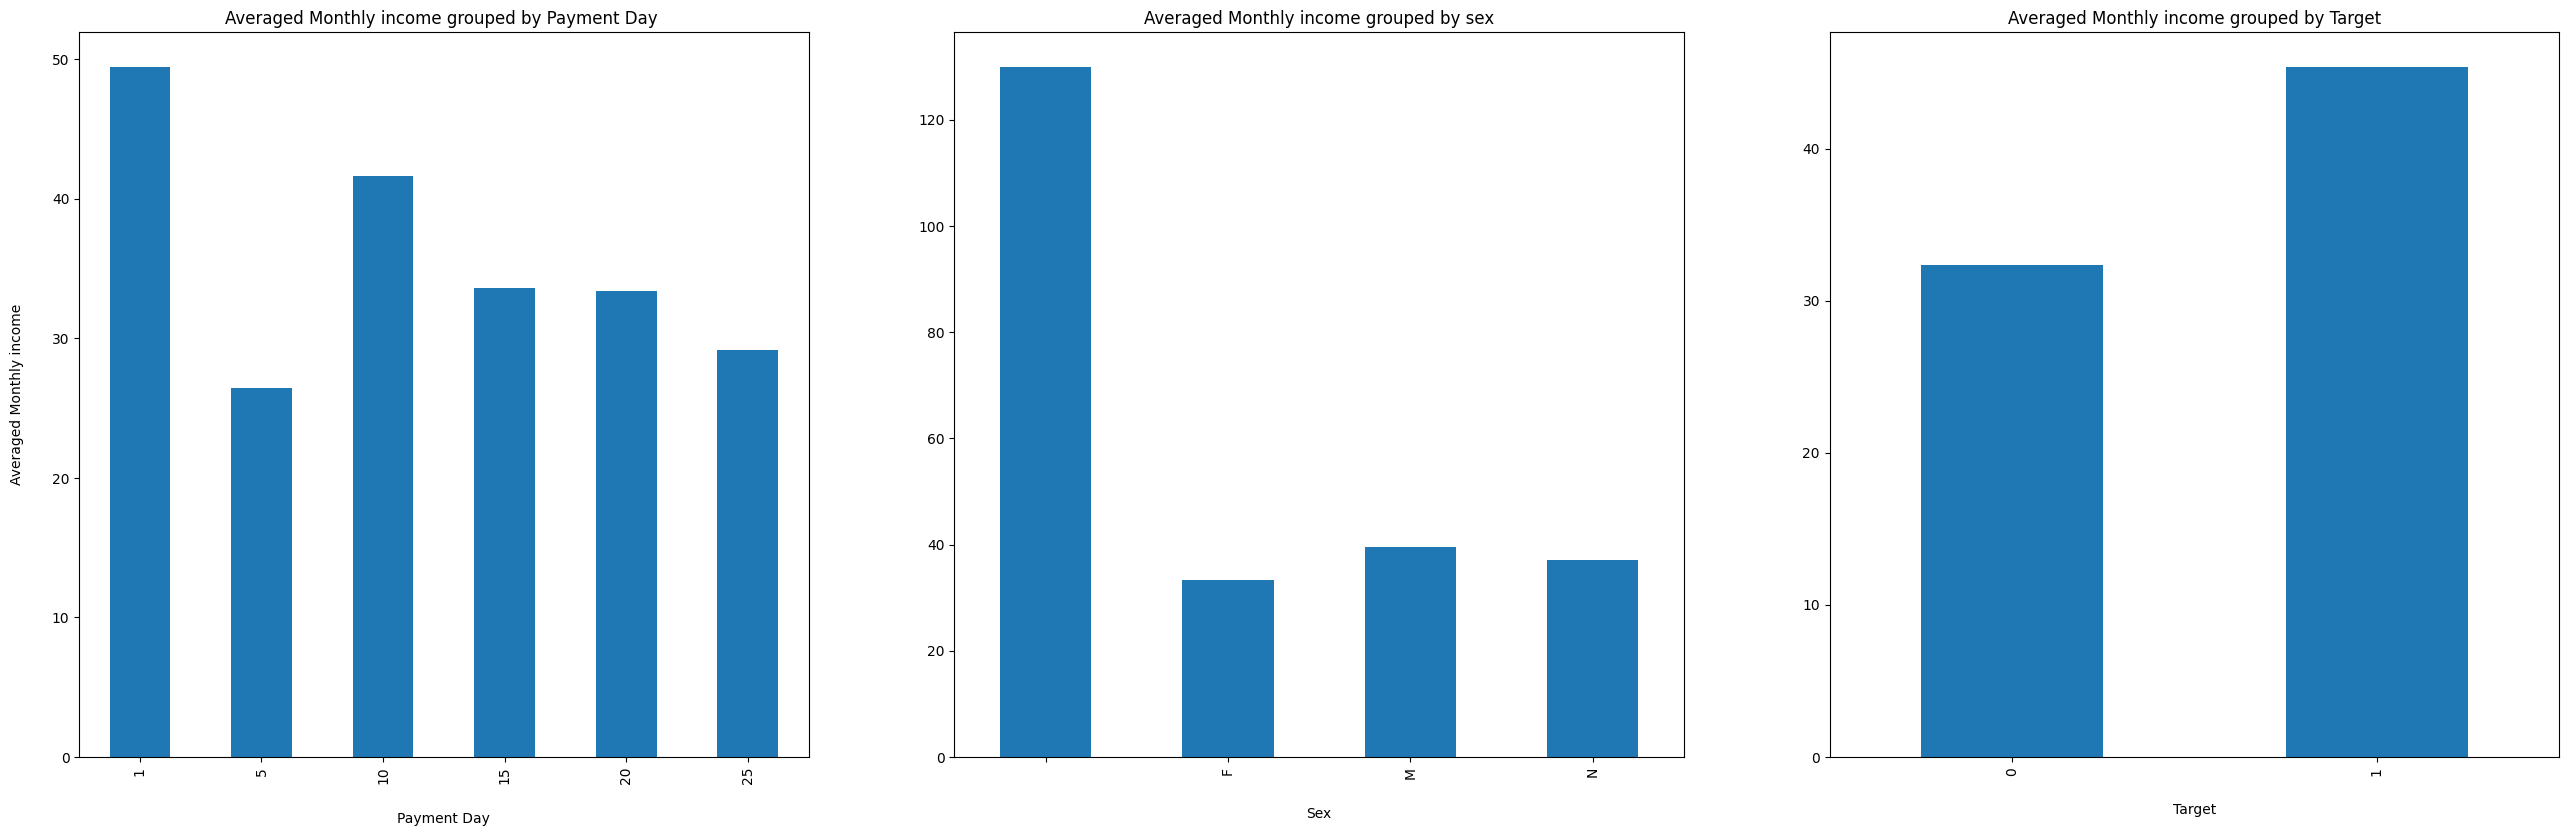

In [125]:
plt.figure(figsize=(32, 32))
plt.subplot(331)
chart = X_train.groupby(X_train['PAYMENT_DAY'])['OTHER_INCOMES'].mean().plot.bar()
chart.set(title="Averaged Monthly income grouped by Payment Day ")
plt.xlabel('Payment Day', fontsize=10,labelpad=20)
plt.ylabel('Averaged Monthly income', fontsize=10, labelpad=20)

plt.subplot(332)
chart = X_train.groupby(X_train['SEX'])['OTHER_INCOMES'].mean().plot.bar()
chart.set(title="Averaged Monthly income grouped by sex")
plt.xlabel('Sex', fontsize=10,labelpad=20)
plt.ylabel('', fontsize=10, labelpad=20)

plt.subplot(333)
chart = X_train.groupby(X_train['TARGET_LABEL_BAD=1'])['OTHER_INCOMES'].mean().plot.bar()
chart.set(title="Averaged Monthly income grouped by Target")
plt.xlabel('Target', fontsize=10,labelpad=20)
plt.ylabel('', fontsize=10, labelpad=20)

plt.show()

In [126]:
IPython.display.HTML(X_train[X_train['QUANT_DEPENDANTS']==53].to_html())


,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


<Figure size 1000x500 with 0 Axes>

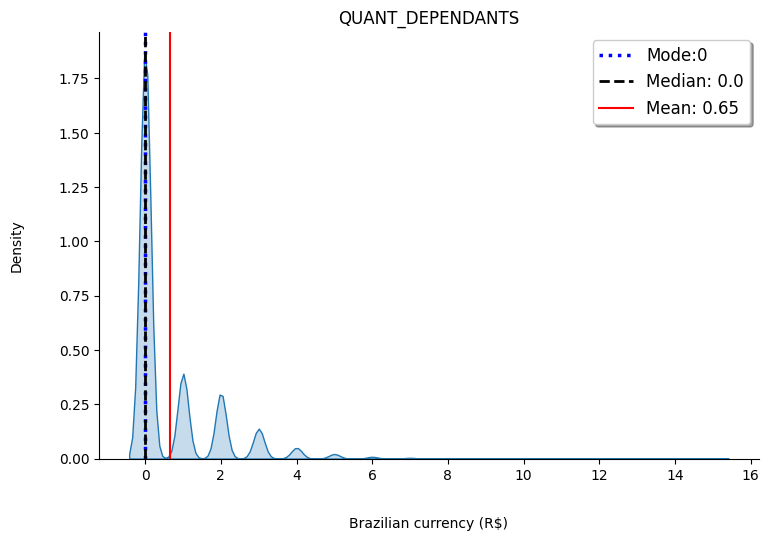

In [128]:
visualization.sns_displot(X_train['QUANT_DEPENDANTS'],'QUANT_DEPENDANTS','Brazilian currency (R$)','Density')


In [129]:
IPython.display.HTML(X_train[X_train['PERSONAL_ASSETS_VALUE']>=1000000].to_html())


,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48432,10,Web,1,M,4,6,BA,INHAMBUPE,1,BA,INHAMBUPE,ZONA RURAL,N,,1.0,63.0,1,350.0,200.0,0,0,0,0,0,0,0,5000000.0,0,N,N,NaN,1.0,1,63,484,484,0
14880,10,Web,2,F,2,1,RS,sao francisco,1,RS,novo hamburgo,primavera,Y,54,1.0,13.0,1,543.0,0.0,0,0,0,0,0,0,0,6000000.0,0,Y,Y,9.0,NaN,1,38,933,933,1
26523,10,Web,1,F,2,1,MS,ITABUNA,1,MS,COSTA RICA,SAO FRANCISCO,N,,1.0,2.0,1,38000.0,0.0,0,0,0,0,0,0,0,1500000.0,0,Y,N,NaN,NaN,1,58,795,795,0
12916,10,0,1,F,6,2,SE,CUMBE,1,SP,Sao Paulo,Conjunto Habitacional Barro Branco II,Y,5,1.0,13.0,1,650.0,0.0,0,1,0,0,0,1,1,1800000.0,1,N,Y,2.0,5.0,1,37,847,847,0
35355,10,Web,1,M,2,1,PR,PARANAVAI,1,PR,COLORADO,ALTO ALEGRE,Y,44,1.0,8.0,1,715.0,0.0,0,0,0,0,0,0,0,2500000.0,0,Y,Y,NaN,2.0,1,33,866,866,0


<Figure size 1000x500 with 0 Axes>

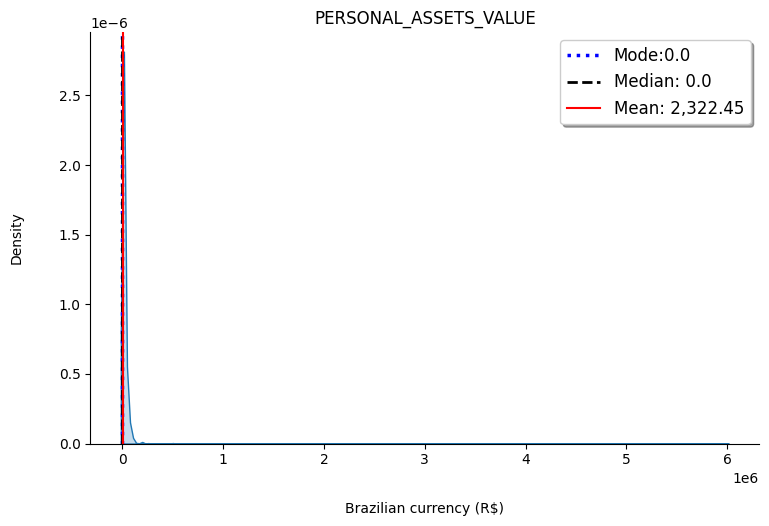

In [130]:
visualization.sns_displot(X_train['PERSONAL_ASSETS_VALUE'],'PERSONAL_ASSETS_VALUE','Brazilian currency (R$)','Density')


In [136]:
X_train['TARGET_LABEL_BAD=1'][X_train["PERSONAL_ASSETS_VALUE"]>100000].value_counts()

0    67
1    12
Name: TARGET_LABEL_BAD=1, dtype: int64

<Figure size 1000x500 with 0 Axes>

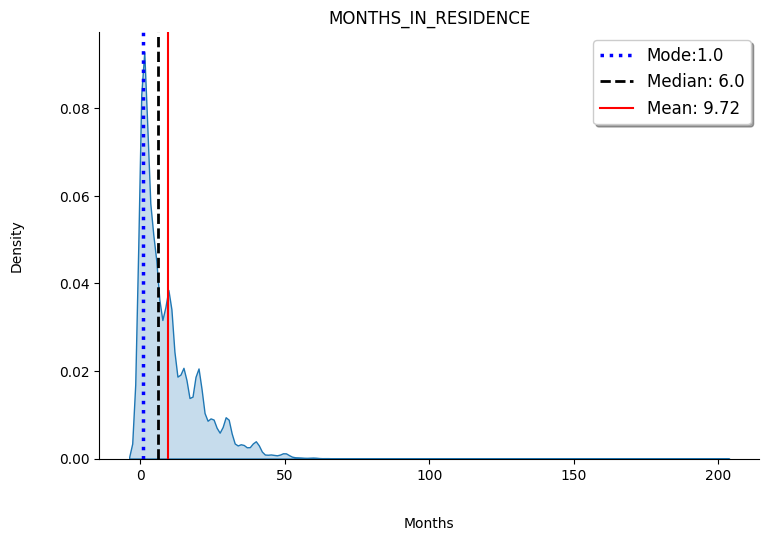

In [137]:
visualization.sns_displot(X_train["MONTHS_IN_RESIDENCE"],'MONTHS_IN_RESIDENCE','Months','Density')


In [138]:
X_train["MONTHS_IN_RESIDENCE"].value_counts().sort_index()

0.0      3736
1.0      5849
2.0      2588
3.0      1829
4.0      1283
         ... 
96.0        1
99.0        1
100.0       1
101.0       1
200.0       1
Name: MONTHS_IN_RESIDENCE, Length: 84, dtype: int64

In [139]:
IPython.display.HTML(X_train[X_train["MONTHS_IN_RESIDENCE"]>100].to_html())

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
ID_CLIENT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36666,10,Web,1,F,4,1,BA,ALAGOINHAS,1,SP,GUARULHOS,LAVRAS,Y,5,1.0,101.0,1,550.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,9.0,5.0,2,70,716,716,0
4695,10,0,1,M,6,1,PR,SATSUDOESTE,1,PR,JAGUARIAIVA,VILA ANDRE,N,,1.0,200.0,1,900.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,Y,9.0,5.0,1,30,842,842,1


In [140]:
X_train['TARGET_LABEL_BAD=1'][X_train["MONTHS_IN_RESIDENCE"]<=6].value_counts()


0    14102
1     5277
Name: TARGET_LABEL_BAD=1, dtype: int64

<Figure size 1000x500 with 0 Axes>

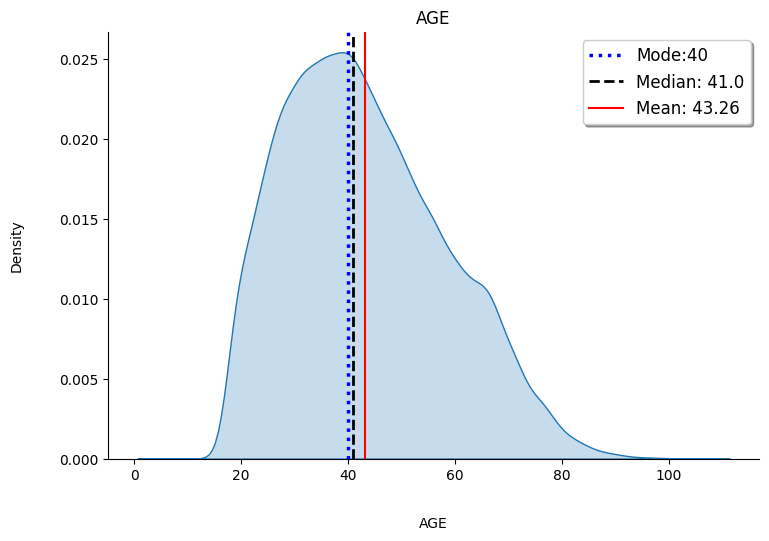

In [142]:
visualization.sns_displot(X_train["AGE"],'AGE','AGE','Density')


In [143]:
X_train['TARGET_LABEL_BAD=1'][X_train["AGE"]>53].value_counts()


0    8086
1    1914
Name: TARGET_LABEL_BAD=1, dtype: int64

In [144]:
X_train['TARGET_LABEL_BAD=1'][(X_train["AGE"]>=17) & (X_train["AGE"]<=20)].value_counts()


0    824
1    550
Name: TARGET_LABEL_BAD=1, dtype: int64

In [145]:
X_train['AGE'][X_train["AGE"]<20].value_counts()


19    458
18    427
17     16
7       1
6       1
14      1
Name: AGE, dtype: int64

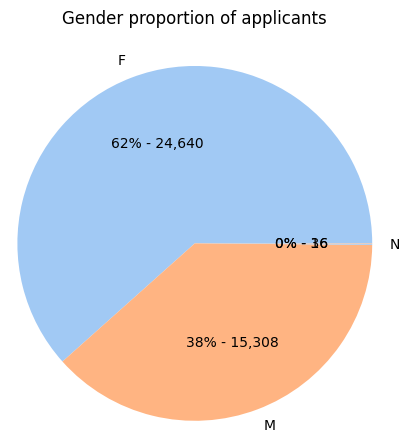

In [147]:
#defining data
data = X_train['SEX'].value_counts()
labels = X_train['SEX'].value_counts().index
# like ggplot
color = sns.color_palette("pastel")[0:2]
# plotting data on pie chart
plt.pie(
    data,
    labels = labels, 
    colors = color,
    #lambda to calculate percentage with f string
    autopct=lambda x:f'{x:.0f}% - {x*sum(data)/100 :,.0f}',
    radius=1.2
    )
#add title and show plot
plt.title('Gender proportion of applicants',pad=25)  
plt.show()

In [148]:
X_train['SEX'].value_counts()


F    24640
M    15308
N       36
        16
Name: SEX, dtype: int64

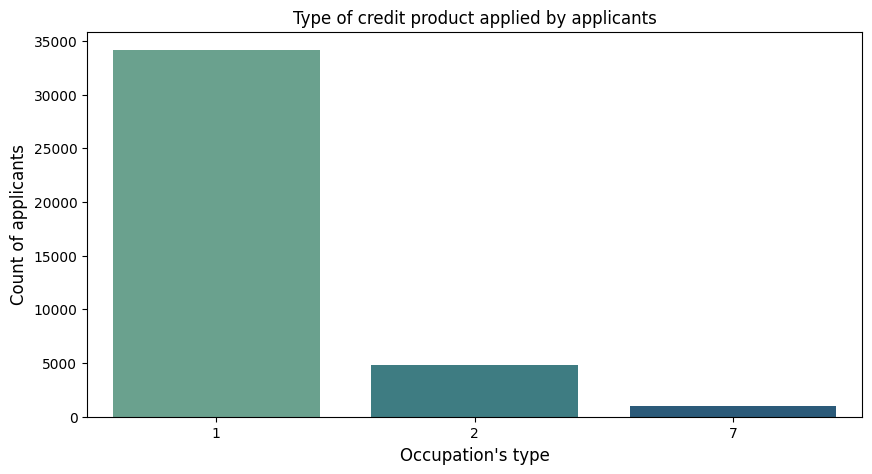

In [149]:
#plot countplot
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data = X_train,
    x ='PRODUCT',
    order = X_train['PRODUCT'].value_counts().index,
    palette='crest'
    )

#customize plot
chart.set(title="Type of credit product applied by applicants")
chart.set_xlabel("Occupation's type", fontsize = 12)
chart.set_ylabel("Count of applicants", fontsize = 12)

plt.show()

In [150]:
visualization.series_count(X_train['PROFESSION_CODE']).sort_index(ascending=False)


,Count,%
18.0,1,0.00
17.0,29,0.07
16.0,272,0.68
15.0,53,0.13
14.0,8,0.02
13.0,237,0.59
12.0,383,0.96
11.0,2790,6.98
10.0,338,0.84
9.0,24092,60.23


In [151]:
visualization.series_count(X_train['OCCUPATION_TYPE']).sort_index(ascending=False)


,Count,%
5.0,5505,13.76
4.0,5673,14.18
3.0,258,0.64
2.0,13544,33.86
1.0,6971,17.43
0.0,2194,5.48
NaN,5855,14.64
